# 2MA100 - Devoir Maison 2

**Sorbonne Université - 30 mars 2020**

Les exercices de ce devoir maison noté sur 20 points doivent être rendus au choix au format **Notebook** (`.ipynb`) ou **Script** (`.py`) en un ou plusieurs fichiers au plus tard le **24 avril 2020** à 23h59 sur [moodle](https://moodle-sciences.upmc.fr/moodle-2019/).


**Attention Plagiat !**


Les devoirs maisons doivent être codés et rendus de manière individuelle. A titre d'information,
voici une définition du plagiat adaptée du [Memento de l'Université de Genève](https://memento.unige.ch/doc/0008/) :

*Le plagiat consiste à insérer, dans un travail académique, des formulations, des
phrases, des passages, des morceaux de code, des images, de même que des idées ou
analyses repris de travaux d'autres auteurs, en les faisant passer pour siens.*

En particulier, le copier-coller à partir de sources trouvées sur Internet ou sur des travaux d'autres
étudiant·es sans citer les sources est considéré comme du plagiat et implique une note zéro.
Le plagiat constitue également une tentative de tricherie sanctionnée par
le règlement de l'université. La solution est d'indiquer dans vos devoirs tout de ce qui ne vient
pas de vous en mentionnant les sources (page Internet, livres, autre étudiant·e,...). Tout les
fichiers rendus seront analysés automatiquement avec un logiciel de détection des similarités
(entre étudiant·es et depuis Internet).





<!-- --- begin exercise --- -->

# Exercice 1: Evaluation polynomiale

On s'intéresse ici à l'évaluation d'un polynôme de la forme,

$$
p(x) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n = \sum_{i=0}^n a_i x^i .
$$

In [1]:
import numpy as np

**a)**
Écrire une fonction Python qui étant donné un réel $x$ et un tableau contenant les valeurs $a_0, a_1, \ldots, a_n$ renvoit la valeur $p(x)$ en utilisant l'expression de la somme ci-dessus.



In [2]:
def evaluate_p_1(x, coef):
    return np.sum([coef[i] * x ** i for i in range(len(coef))])


Pour calculer cette quantité d'une autre manière, on peut remarquer que $p(x)$ peut être vu comme le produit scalaire entre le vecteur $a:=(a_0, a_1, \ldots, a_n)^T$ et un second vecteur (à déterminer) dépendant de $x$.

**b)**
Écrire une seconde fonction Python qui étant donné un réel $x$ et un tableau contenant les valeurs $a_0, a_1, \ldots, a_n$ renvoie la valeur $p(x)$ en utilisant le produit scalaire mentionné ci-dessus.



In [3]:
def evaluate_p_2(x, coef):
    return np.inner(coef, x ** np.arange(len(coef)))


Enfin on peut également utiliser la méthode de Horner qui revient à réécrire le polynôme comme suit,

$$
p(x) = a_0 + x \left( \, a_1  + x \left( a_2 + \ldots + x \, (a_{n-1} + a_n x ) \, \right) \, \right)
$$

L'évaluation du polynôme $p(x)$ est alors donnée par la valeur $\beta$ définit récursivement par

$$
\beta = a_n  \,, \quad
\beta = a_{n-1} + \beta \, x \,, \quad
\cdots \quad
\beta  =   a_0 + \beta \, x \,.
$$

**c)**
Écrire une nouvelle fonction Python qui étant donné un réel $x$ et un tableau contenant les valeurs $a_0, a_1, \ldots, a_n$ renvoie la valeur $p(x)$ en utilisant cette fois-ci la méthode de Horner.



In [4]:
from numba import njit


def evaluate_p_3(x, coef):
    # Initialisation de beta
    beta = coef[-1]
    
    # Mise à jour de beta
    for i in range(2, len(coef) + 1):
        beta = coef[-i] + beta * x

    return beta


@njit
def evaluate_p_3_numba(x, coef):
    # Initialisation de beta
    beta = coef[-1]
    
    # Mise à jour de beta
    for i in range(2, len(coef) + 1):
        beta = coef[-i] + beta * x

    return beta


**d)**
Comparer la rapidité de ces trois fonctions pour la valeur $x$ de votre choix et un polynôme de degré $85$ et dont les coefficients pourront être générés aléatoirement.



In [5]:
coef = np.random.randn(86)
x = 0.96423

In [6]:
evaluate_p_1(x, coef), evaluate_p_2(x, coef), evaluate_p_3(x, coef), evaluate_p_3_numba(x, coef)

(4.3621718430421845, 4.362171843042184, 4.3621718430421845, 4.3621718430421845)

In [7]:
%timeit evaluate_p_1(x, coef)

32.9 µs ± 770 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit evaluate_p_2(x, coef)

3.93 µs ± 18.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit evaluate_p_3(x, coef)

23.5 µs ± 340 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit evaluate_p_3_numba(x, coef)

360 ns ± 2.03 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 2: Urnes de Polya

Une urne contient initialement (à $t=0$) $r_0$ boules rouges et $b_0$ boules blanches. À chaque instant, on tire uniformément une boule au hasard dans l'urne. On remet ensuite cette boule dans l'urne et on y ajoute une boule de la même couleur. Un tel système s'appelle une *urne de Polya*.
Le but de cet exercice est d'étudier le comportement de la fraction de boules rouges dans l'urne, c'est-à-dire le nombre de boules rouges, sur le nombre total.
On appellera respectivement $r_n$ et $b_n$ le nombre de boules rouges et blanches présentes dans l'urne à l'instant $n$.


**a)**
Écrire une fonction `densite` prenant en argument un tuple représentant le nombre de boules rouges et blanches dans une urne, et qui renvoie la densité de boules rouges.



In [11]:
def densite(tuplet):
    rn, bn = tuplet
    return rn / (bn + rn)



On veut construire de manière récursive la distribution du nombre de boules rouges au temps $n$, c'est à dire la liste des probabilités que le nombre de boules rouges soit égal à un entier donné $k$ (qui sera l'indice de la liste). Cela se fait en écrivant deux fonctions : `next_dist_rouge`, prenant en argument la distribution à un instant $n$ et qui renvoie celle à l'instant $n+1$, qui est donc la fonction qui fait tout le travail, et `dist_rouge` qui est la fonction d'enrobage, prenant en argument $r_0$, $b_0$ et le temps $n$ et qui nous renvoie la distribution au temps $n$ par un appel récursif.
On utilisera les faits utiles suivants (faire un petit dessin):
* la distribution passée en argument à `next_dist_rouge` est une liste `r` et `r[k]` représente la probabilité d'avoir `k` boules rouges dans l'urne à l'instant $n$. Les indices pour `r` varient de 0 au nombre total `s` de boules à l'instant $n$.

* au temps $n+1$, pour avoir $k$ boules rouges, il faut

  * soit avoir eu $k$ boules rouges à l'instant précédent et ne pas avoir tiré une boule rouge

  * soit avoir eu $k-1$ boules rouges à l'instant précédent et avoir tiré une boule rouge


* si $n=0$, le résultat de `dist_rouge` est complètement déterministe et les coefficients de la liste ne sont que des 0 et 1, dépendant de $r_0$ et $b_0$

**b)**
Écrire les fonctions `next_dist_rouge` et `dist_rouge` en utilisant les indications fournies. Regarder le résultat de `dist_rouge(0,1,n)` et `dist_rouge(1,1,n)` pour différentes valeurs de `n` (1,2,5,10,20,...) et commenter.



In [12]:
def next_dist_rouge(r):
    # Calculer le nombre de boules 
    n_balls = len(r) - 1
    
    # Rajouter un 0 à la fin de liste, correspondant à la probabilité
    # qu'il y ait n_balls + 1 boules rouges à l'instant précédent
    r.append(0)
    
    # Créer une nouvelle liste pour la nouvelle distribution
    r_new = [-1] * (len(r))
    
    # Calculer la nouvelle distribution
    r_new[0] = r[0]
    for k in range(1, n_balls + 2):
        r_new[k] = r[k] * (1 - densite((k, n_balls - k))) + r[k - 1] * densite((k - 1, n_balls - k + 1))
    
    # Renvoyer la nouvelle distribution
    return r_new
    
def dist_rouge(r0, b0, n):
    # Cas n = 0
    # On veut une liste de longeur (r0 + b0 + 1) avec un 1 à l'indice r0
    # et des 0 partout ailleurs
    if n == 0:
        res = [0] * (r0 + b0 + 1)
        res[r0] = 1
        return res
    
    # Cas n > 0
    # On calcule la nouvelle distribution à partir de la distribution précédente
    else:
        return next_dist_rouge(dist_rouge(r0, b0, n - 1))

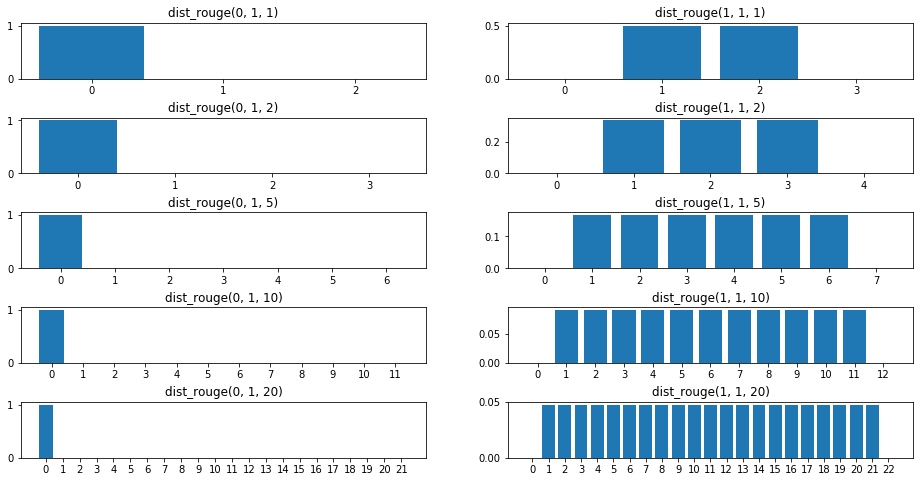

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 8))
count = 0
indices = np.r_[np.arange(1, 11, 2), np.arange(2, 11, 2)]


for i in (0, 1):
    for n in (1, 2, 5, 10, 20):
        plt.subplot(5, 2, indices[count])
        plt.bar(np.arange(n + i + 2), dist_rouge(i, 1, n))
        plt.xticks(np.arange(n + i + 2))
        plt.title(f'dist_rouge({i}, 1, {n})')
        count += 1
        
plt.subplots_adjust(hspace=0.7)

* Quand on commence avec 0 boule rouge, il n'est jamais possible de tirer une boule rouge, donc il y a toujours 0 boule rouge.
* Quand on commence avec 1 boule rouge et 1 boule blanche, la distribution du nombre de boules rouges est uniforme sur l'intervalle (1, n + 1).



Plutôt que de calculer théoriquement pour chaque $n$, la suite des  probabilités théoriques, nous allons faire des statistiques sur un grand nombre d'évolutions d'urnes de Polya, au bout d'un grand nombre d'étapes. Pour cela, il nous faut une fonction pour faire évoluer une urne de Polya.

**c)**
Définir une fonction `polya_step(r,b)` qui, à partir de la composition d'une urne passée sous forme de deux paramètres `r` et `b`, renvoie l'évolution (aléatoire) après une étape de la composition de l'urne sous forme d'un tuple `(r',b')`. Définir également une fonction `polya(r0,b0,N)` prenant en argument $r_0$, $b_0$ et $N$ en paramètres et renvoyant la composition (aléatoire) d'une urne de Polya au bout de $N$ étapes, aussi sous forme de tuple `(r_N,b_N)`.



In [14]:
def polya_step(r, b):
    # On génère une variable aléatoire sur l'intervalle [0, 1]
    # Si la variable est inférieure à la proportion de boules rouges, alors on a tiré
    # une boule rouge, sinon on a tiré une boule blanche
    if np.random.uniform() < densite((r, b)):
        return (r + 1, b)
    else:
        return (r, b + 1)
    
def polya(r0, b0, N):
    # Initialisation de r et b avec les valeurs initiales
    r, b = r0, b0
    
    # Mise à jour de r et b en utilisant la fonction polya_step
    for _ in range(N):
        r, b = polya_step(r, b)
    
    # Renvoie de la distribution finale de boules
    return r, b


**d)**
Écrire une fonction `data_rdens_polya(r0,b0,N,nbexp)` qui renvoie une liste de longueur `nbexp` contenant les densités de `nbexp` réalisations d'urnes de Polya au temps `N` initialisées avec `r0` boules rouges et `b0` boules blanches.



In [15]:
def data_rdens_polya(r0, b0, N, nbexp):
    res = []
    for _ in range(nbexp):
        res.append(densite(polya(r0, b0, N)))
    return res


**e)**
Stocker dans une variable le résultat de `data_rdens_polya(2,3,1000,10000)` et dessiner un histogramme pour voir la répartition des densités. Attention, on veut que les hauteurs des barres soient normalisées pour que leur surface représente la proportion de points, et non pour qu'elles donnent le nombre de points par *bin*.

**Indication:** Une bonne règle de départ est de choisir le nombre de boites (*bins*) pour un histogramme de l'ordre de la racine carrée du nombre de points. Consulter la documentation de la fonction de `hist` de Matplotlib.



In [16]:
res = data_rdens_polya(2, 3, 1000, 10000)

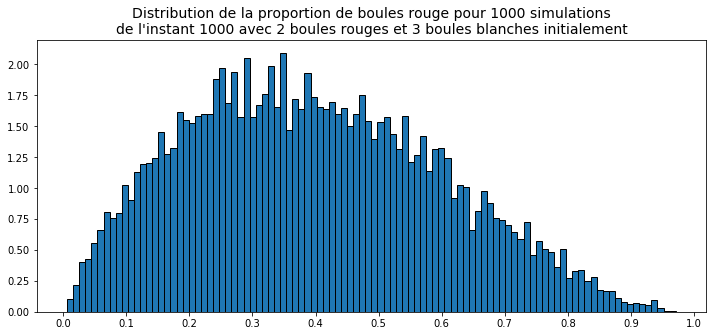

In [17]:
plt.figure(figsize=(12, 5))
plt.hist(res, density=True, edgecolor='k', bins=100);
plt.title("Distribution de la proportion de boules rouge pour 1000 simulations\n"
          "de l'instant 1000 avec 2 boules rouges et 3 boules blanches initialement",
          fontsize=14);
plt.xticks(np.linspace(0, 1, 11));




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 3: Méthode des moindres carrés

Le fichier ci-joint `population.txt` contient les données statistiques de la population de quelques communes françaises ventilée par le sexe et l'âge de la personne.
Les premières lignes de ce fichier sont:

        CODGEO;LIBGEO;SEXE;AGED100;NB
        13201;Marseille 1er Arrondissement;1;000;293.98064823
        13201;Marseille 1er Arrondissement;1;001;311.40411923
        13201;Marseille 1er Arrondissement;1;002;257.55156994
        13201;Marseille 1er Arrondissement;1;003;249.26498077


Le premier champ est le code postal,
le second la dénomination de la commune, le troisième le sexe (1 pour masculin, 2 pour féminin),
la quatrième la tranche d'âge et le dernier la population.
Par exemple la seconde ligne du fichier signifie qu'il y a 293.98 personnes de sexe masculin ayant 0 an dans le 1er arrondissement de Marseille.


**a)**
Écrire une fonction `pop(code)` qui retourne sous forme de liste ou de vecteur Numpy la population par âge sans distinction homme-femme dans la commune de code postal `code`.
Utiliser cette fonction pour déterminer le nombre total d'habitants dans les communes de code postal 13201 et 75102.



In [18]:
import pandas as pd

df = pd.read_csv('population.txt', sep=';')
df.head(5)

,CODGEO,LIBGEO,SEXE,AGED100,NB
0,13201,Marseille 1er Arrondissement,1,0,293.980648
1,13201,Marseille 1er Arrondissement,1,1,311.404119
2,13201,Marseille 1er Arrondissement,1,2,257.551570
3,13201,Marseille 1er Arrondissement,1,3,249.264981
4,13201,Marseille 1er Arrondissement,1,4,188.591426


In [19]:
def pop(code):
    return df[df['CODGEO'] == code].groupby('AGED100')['NB'].sum().values

In [20]:
pop(13201)

array([607.11766657, 557.35999529, 452.21531209, 456.04382958,
       399.23878026, 441.74964935, 458.88097888, 371.02489207,
       472.51063581, 512.81178202, 474.29481221, 418.74666841,
       358.4080661 , 353.59495496, 337.65495901, 351.81206984,
       389.31739559, 405.39002439, 713.48502213, 778.50142113,
       654.14669852, 818.05227945, 664.89743467, 666.75919954,
       752.56609732, 700.57480601, 623.58333324, 642.3577027 ,
       607.7616914 , 664.2436937 , 610.36076791, 644.39262952,
       631.58760987, 655.46396476, 616.70201015, 512.69538601,
       547.38124901, 534.62594909, 519.95034318, 597.21403241,
       610.26874989, 591.26298192, 576.73251483, 602.7963537 ,
       503.37631578, 589.39199737, 521.98768073, 572.6007483 ,
       534.2856585 , 561.52091366, 536.37799692, 569.96000041,
       443.1062994 , 454.40717103, 539.66048922, 463.11716437,
       460.67572486, 423.38696478, 408.01001429, 425.4723547 ,
       371.48738064, 421.66647374, 375.65389107, 408.53

In [21]:
pop(75102)

array([202.14069108, 183.17320974, 210.76584696, 196.33426089,
       227.61892214, 122.93420647, 148.25670333, 191.29412781,
       156.25936916, 175.92997835, 117.88166933, 175.74539177,
       119.14832179, 159.75881115, 165.1609773 , 128.13026581,
       108.42540894, 133.35703487, 175.25498064, 162.22460444,
       199.55153893, 249.74737444, 336.51624601, 490.36735914,
       610.17662806, 557.47408531, 541.55093304, 572.63706127,
       633.69557801, 522.68125725, 579.55316318, 564.05614747,
       523.42849472, 364.41069738, 442.65277096, 389.11681775,
       355.79565748, 349.31304616, 391.53789967, 345.75812019,
       334.19593291, 332.98952401, 326.71432875, 346.09648169,
       344.15961891, 334.89980683, 263.38425063, 242.12517857,
       312.84697083, 288.08081437, 292.9752124 , 231.75710425,
       298.22494416, 217.2097544 , 276.98443799, 249.60181616,
       187.77296859, 179.56519728, 233.87668887, 207.16221848,
       155.76693637, 220.99250307, 190.15791416, 169.70

In [22]:
for code in (13201, 75102):
    print(f"Taille totale de la population dans la commune {code} = {np.sum(pop(code)):.0f}")

Taille totale de la population dans la commune 13201 = 40346
Taille totale de la population dans la commune 75102 = 20796



**b)**
Écrire une fonction `plot_pop(code)` affichant graphiquement les fractions de la population
(normalisées par la population totale de la commune) en fonction de l'âge sans distinction homme-femme dans la commune de code postal `code`.
Tester pour les communes de code postal 13201 et 75102.



In [23]:
def plot_pop(code):
    population = pop(code)
    population /= np.sum(population)
    plt.bar(np.arange(101), population)

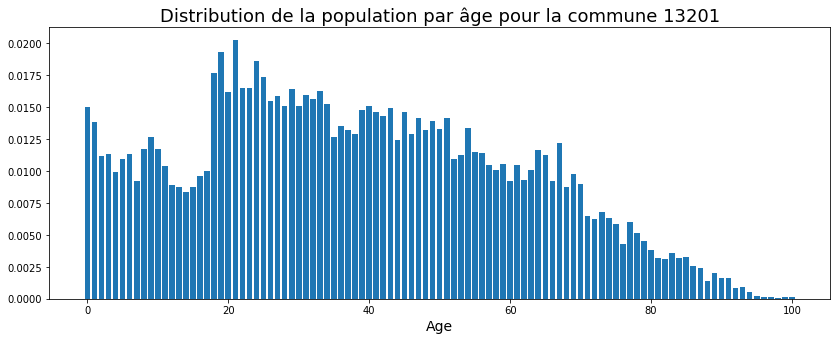

In [24]:
plt.figure(figsize=(14, 5))
plot_pop(13201)
plt.title('Distribution de la population par âge pour la commune 13201', fontsize=18);
plt.xlabel('Age', fontsize=14);

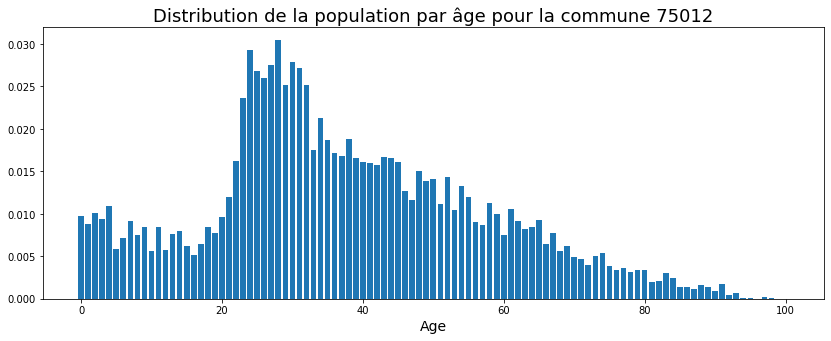

In [25]:
plt.figure(figsize=(14, 5))
plot_pop(75102)
plt.title('Distribution de la population par âge pour la commune 75012', fontsize=18);
plt.xlabel('Age', fontsize=14);


Pour une commune donnée, si on dénote par $p(a)$ la fraction de la population ayant l'âge $a$,
on cherche les coefficients $r_0$, $r_1$, $r_2$ tels que la loi

$$
p(a) = r_0+r_1a+r_2a^2
$$

soit la mieux satisfaite pour les âges $a\geq25$.
Pour cela on résout le problème aux moindres carrés

$$
\min_{\vec{r}\in \mathbb{R}^3}||X\vec{r}-\vec{p}||^2
$$

où en notant le vecteur des âges $\vec{a}=(25,26,\dots,100)$,
$X$ est la matrice $76\times 3$ telle que $X_{i,1}=1$, $X_{i,2}=a_i$, $X_{i,3}=a_i^2$ et
$\vec{p}$ est le vecteur des populations par âge $p_i = p(a_i)$.
La solution de ce problème est $\vec{r} = (r_0,r_1,r_2)\in \mathbb{R}^3 $. Cette solution satisfait l'équation

$$
~^t\!XX\vec{r}=~^t\!X\vec{p}
$$

où $~^t\!X$ désigne la transposée de $X$.
Pour les communes de code postal 13201 et 75102, résoudre les questions suivantes:

**c)**
Pour la commune 13201, former la matrice $X$ et le vecteur $\vec{p}$, puis déterminer la solution $\vec{r}$.



In [26]:
# Création de la matrice X
a = np.arange(25, 101)
X = np.vstack([np.ones_like(a), a, a ** 2]).T

# Création du vecteur p pour la commune de code postale 13201
pop_13201 = pop(13201) / np.sum(pop(13201))
p_13201 = pop_13201[25:]

np.linalg.solve(X.T @ X, X.T @ p_13201)

array([ 1.78886093e-02, -1.96378818e-05, -1.75486684e-06])


**d)**
Pour les communes de code postal 13201 et 75102, tracer la courbe théorique $r_0+r_1a+r_2a^2$ en fonction de l'âge par dessus les données.



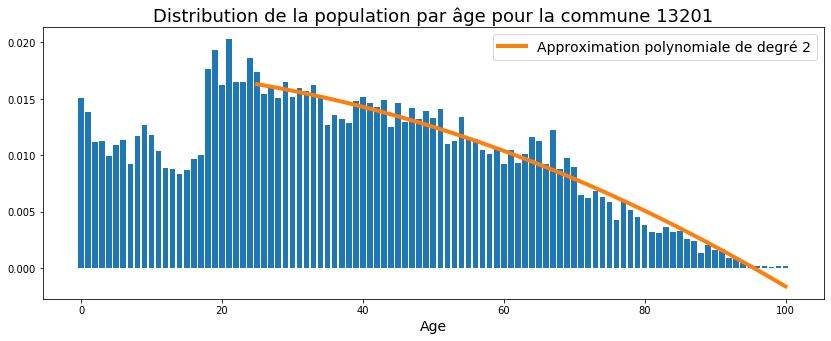

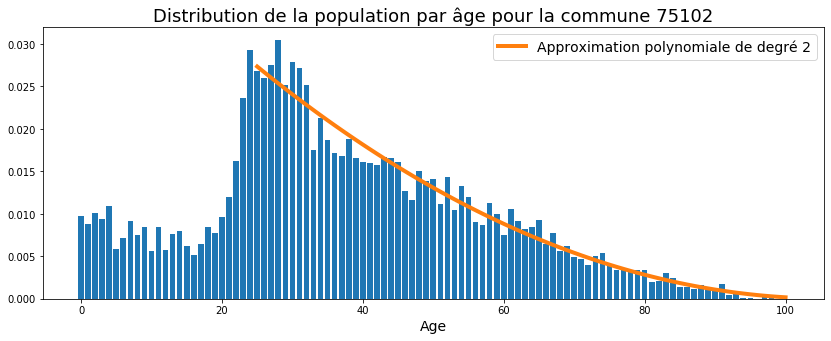

In [27]:
for code in (13201, 75102):

    plt.figure(figsize=(14, 5))
    plot_pop(code)
    pop_code = pop(code) / np.sum(pop(code))
    p_code = pop_code[25:]
    r_code = np.linalg.solve(X.T @ X, X.T @ p_code)
    plt.plot(a, np.inner(r_code, X), color='C1', lw=4,
             label='Approximation polynomiale de degré 2')
    plt.title(f'Distribution de la population par âge pour la commune {code}', fontsize=18);
    plt.xlabel('Age', fontsize=14);
    plt.legend(fontsize=14);